# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [82]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [86]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality
    fig = plt.figure(figsize=(15,12))
    sns.distplot(sample, kde=True)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar = sample.mean()
    
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1-alpha, df=df)
    
    # Calculate the t-value and p-value      
    results = stats.ttest_1samp(a=sample, popmean=mu)
    
    # return results
    if results[0] > t_crit and results[1] < alpha:
        print('Null hypothesis is rejected:')
    else:
        print('Null hypothesis cannot be rejected:')
    print(f't-critical value: {round(t_crit, 3)}')
    print(f't-value: {round(results[0], 3)}')
    print(f'alpha: {round(alpha, 3)}')
    print(f'p-value: {round(results[1], 1)}')

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

Null hypothesis is rejected:
t-critical value: 1.729
t-value: 12.688
alpha: 0.05
p-value: 0.0


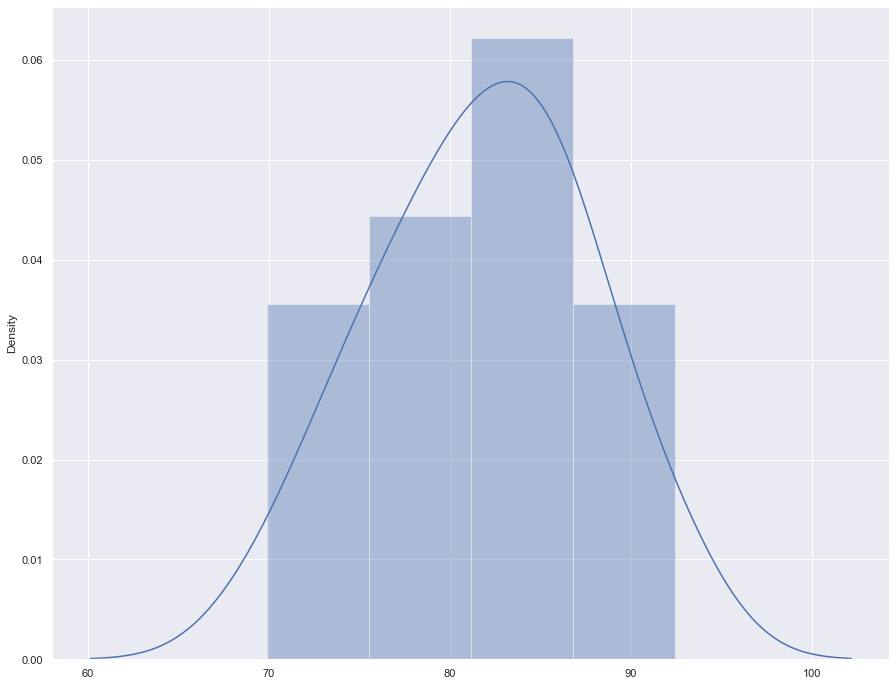

In [87]:
samp1 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

popmean = 65
alpha = 0.05

one_sample_ttest(samp1, popmean, alpha)

The sample mean is statistically significant. P-value is very very low (~1e-10) and t-value is ~7x the t-critical value.

In [90]:
# Bonus - effect size!

def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [106]:
# Since we're comparing samp1 to the population (and we don't have a population dataset),
# let's generate a random population with the given popmean, and the same std_dev as the sample

import scipy.stats

population = scipy.stats.norm(popmean, samp1.std())
pop_data = population.rvs(1000)

cohen_d = Cohen_d(samp1, pop_data)
print(f'Using a generated population dataset, it appears that the Cohen d value is:')
print(f'{cohen_d}')
print('This means that samp1 sees a very large positive effect on test scores, compared with the population.')

Using a generated population dataset, it appears that the Cohen d value is:
2.7946288322081294
This means that samp1 sees a very large positive effect on test scores, compared with the population.


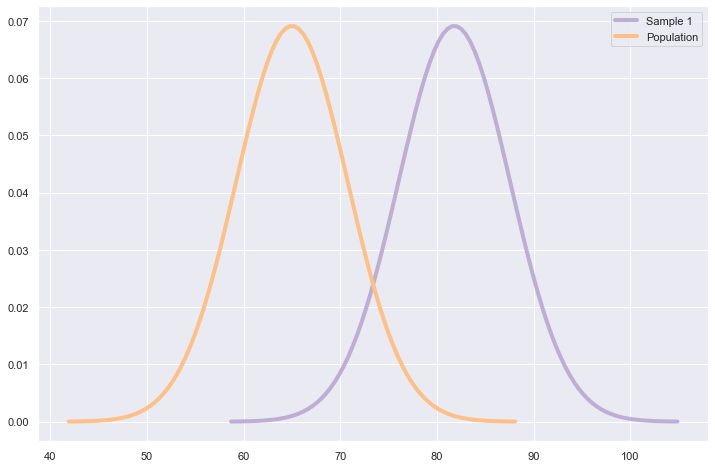

In [114]:
samp1_dist = scipy.stats.norm(samp1.mean(), samp1.std())

def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

plt.figure(figsize=(12,8))

xs, ys = evaluate_PDF(samp1_dist)
plt.plot(xs, ys, label='Sample 1', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(population)
plt.plot(xs, ys, label='Population', linewidth=4, color='#fdc086')
plt.legend()

Null hypothesis is rejected:
t-critical value: 1.729
t-value: 13.202
alpha: 0.05
p-value: 0.0


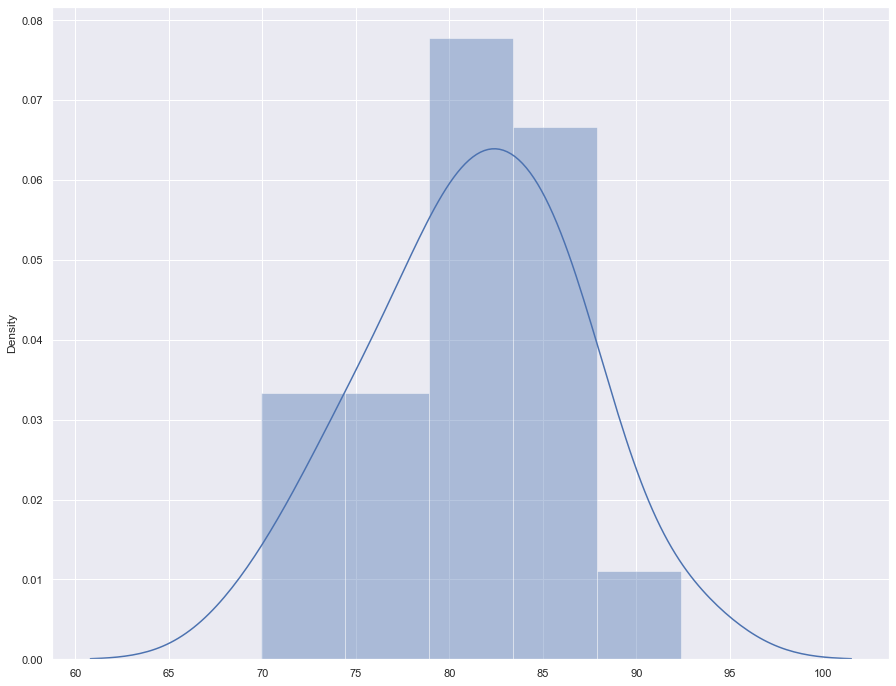

In [115]:
samp2 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

one_sample_ttest(samp2, popmean, alpha)

Even with the updated value, the t-/p-values are virtually unchanged.

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 